In [83]:
# Instalación de librerias 

#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [84]:
class TimeSerie:

    def __init__(self,interval,amount_data):
        self.interval = interval
        self.amount_data = amount_data

    def set_data(self):
        self.time = self.interval * np.sort(np.random.rand(self.amount_data))
        self.magnitud = np.random.randn(self.amount_data)

    def normalize(self):
        #Normalizar el tiempo para dejar todos los valores entre 0 y 1
        aux_time = self.time
        self.time =  (aux_time- aux_time.min())/(aux_time.max()-aux_time.min())

    def get_time(self):
        return self.time

    def get_magnitud(self):
        return self.magnitud

    def get_all_data(self):
        all_info = f'interval: {self.interval}\namount_data: {self.amount_data}'
        print(all_info)

    def view_time_serie(self,rows=6,cols=16,font_size=18):
        title_figure = f'Time serie'
        plt.figure(figsize=(cols,rows))
        plt.plot(self.time,self.magnitud)
        plt.scatter(self.time,self.magnitud)
        plt.ylabel("Magnitud")
        plt.xlabel("Time")
        plt.suptitle(title_figure,fontsize=font_size)
        plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
        plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
        plt.show()




interval: 150
amount_data: 100


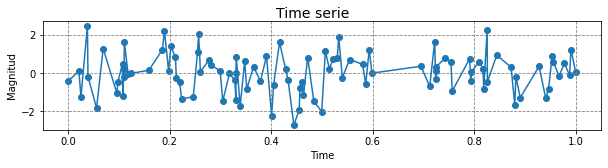

In [85]:
time_serie = TimeSerie(150,100)

time_serie.set_data()
time_serie.normalize()

time_serie.get_all_data()
# print(time_serie.get_time())
time_serie.view_time_serie(2,10,14)

In [86]:
# Configuracion de parametros globales
amount_bins = 10
period = 1
num_periods = 3


In [87]:
#Creacion de un array que contiene los T/n periodos distintos
def generate_periods(num_periods=1):
    all_period = [1]
    
    for i in range(1, num_periods):
        all_period.append(2**i)
    
    return all_period

array_periods = generate_periods(num_periods)
# print(array_periods)


#Creacion del grafico aplicando el metodo de folding
def drawGraphic(time,mag,indice,period):
    title_figure = f'Folded Time Serie with period T/{period}'
    #Grafico para ver la serie de tiempo 
    plt.figure(figsize=(12,4))
    plt.plot(time[indice], mag[indice])
    plt.scatter(time[indice], mag[indice])
    plt.ylabel("Magnitud")
    plt.xlabel("Time")
    plt.suptitle(title_figure, fontsize=22)
    plt.grid(axis='x', color='red', linestyle='-', linewidth=2)
    plt.grid(axis='y', color='gray', linestyle='dashed')
    plt.show()


def getStatistic(index,indBin,magnitud):
    mag_ordered = magnitud[index]
    #print("magOrdered: ", magOrdered)

    vector_mean = np.array([np.nanmean(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000  for i in range(amount_bins)])
    vector_max = np.array([np.nanmax(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])
    vector_min = np.array([np.nanmin(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])
    vector_std = np.array([np.nanstd(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])

    print("mean:",vector_mean)
    print("max:",vector_max)
    print("min:",vector_min)
    print("std:",vector_std)
    return [vector_mean,vector_max,vector_min,vector_std]
    

def variantion_period(array_periods,time_serie):
    
    for index, period in enumerate(array_periods):
        # print(periods)
        print(f'Periodo T/{period}')

        #valor del periodo en decimales
        period_float = 1 / period

        #proceso de folding
        folded_time = time_serie.get_time() % period_float
        #indices de los datos para encontrarlos luego del folding
        index_folded = np.argsort(folded_time)

        #Divido el periodo en bins o intervalos [0,n] para luego obtener datos estadisticos de cada bin
        bins = np.linspace(0,period_float,amount_bins+1)

        #Concentración de datos en cada bin
        concentration, bin_edges= np.histogram(folded_time[index_folded],bins=bins)
        #indices - Devuelve los índices de los bins a los que pertenece cada valor del folded_time
        index_bin = np.digitize(folded_time[index_folded],bins=bins)

        print("bins: ",bins)
        print("concentracion de datos en cada bin: ",concentration)
        print("indice de cada bin: ",index_bin)

        drawGraphic(folded_time,time_serie.get_magnitud(),index_folded,period)
        #primer piso de la matriz que contendrá las caracteristicas en distintos periodos
        vectorStatisticPeriod = np.asmatrix(getStatistic(index_folded,index_bin,time_serie.get_magnitud()))
        print('-'*100)

     

Periodo T/1
bins:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
concentracion de datos en cada bin:  [10 11 12 12 13 11  1 11 10  9]
indice de cada bin:  [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  8  8
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10
 10 10 10 10]


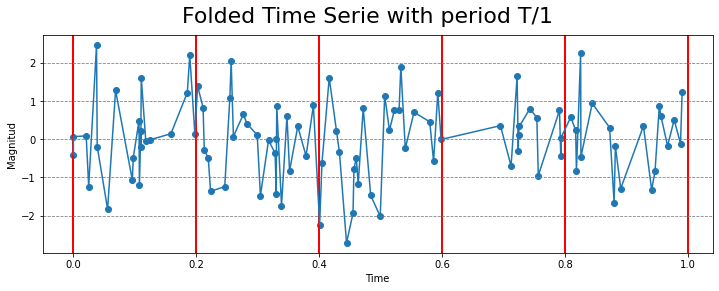

mean: [-0.13297117  0.41133774  0.26885062 -0.30128639 -0.85690094  0.57629185
  0.35515297  0.16871437 -0.01431242  0.12318624]
max: [2.46063962 2.20089105 2.03820296 0.88336292 1.60474509 1.89396603
 0.35515297 1.64248394 2.25389737 1.22577294]
min: [-1.83349912 -1.2094492  -1.36491173 -1.73737419 -2.71525118 -0.57746905
  0.35515297 -0.95112944 -1.66866884 -1.32909586]
std: [1.18363014 0.89954943 0.97703521 0.875456   1.20324113 0.67524471
 0.         0.72130428 1.08877429 0.77154155]
----------------------------------------------------------------------------------------------------
Periodo T/2
bins:  [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
concentracion de datos en cada bin:  [12  9  7  5 12 11 14  8  9 13]
indice de cada bin:  [ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  9

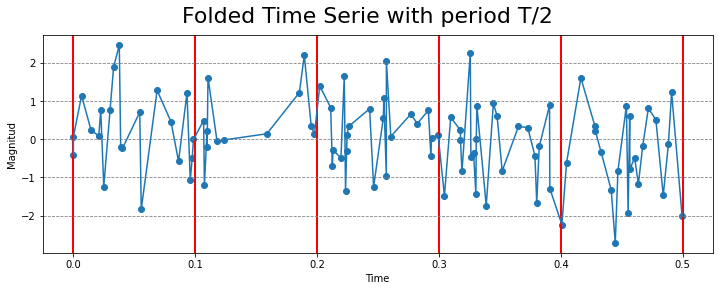

mean: [ 0.44382896 -0.03516098  0.119515    0.80865263  0.06105104  0.39540482
 -0.06189222 -0.36150872 -0.65402909 -0.31882879]
max: [2.46063962 1.28041976 1.61448014 2.20089105 1.64248394 2.03820296
 2.25389737 0.88336292 1.60474509 1.22577294]
min: [-1.24013644 -1.83349912 -1.2094492   0.12385931 -1.36491173 -0.95112944
 -1.73737419 -1.66866884 -2.71525118 -2.02120348]
std: [0.98358932 0.99281024 0.78322162 0.80308975 0.92891015 0.75315817
 1.06012206 0.81467347 1.2560549  1.05577626]
----------------------------------------------------------------------------------------------------
Periodo T/4
bins:  [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25 ]
concentracion de datos en cada bin:  [12 11  8 15 10  5  4 10 17  8]
indice de cada bin:  [ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  3
  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5
  5  5  5  5  5  5  5  5  6  6  6  6  6  7  7  7  7  8  8  8  8  8  8  8
  8  8  8 

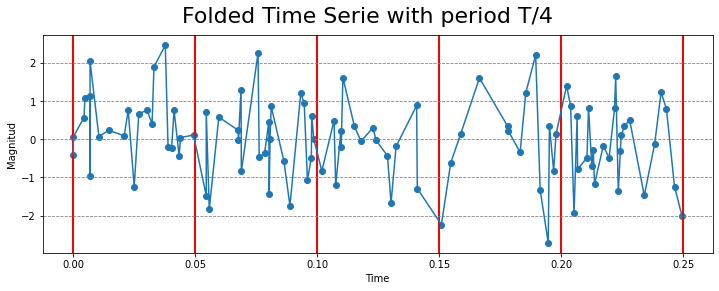

mean: [ 0.28791152  0.56549657 -0.17277453  0.01328376  0.06436532 -0.5398236
 -0.27453095 -0.07448748 -0.08402208 -0.24797331]
max: [2.03820296 2.46063962 1.28041976 2.25389737 1.61448014 0.88336292
 1.60474509 2.20089105 1.64248394 1.22577294]
min: [-1.24013644 -0.44391726 -1.83349912 -1.73737419 -1.2094492  -1.66866884
 -2.23355365 -2.71525118 -1.93656395 -2.02120348]
std: [0.87710241 0.86279825 1.03342272 1.02906665 0.72459469 0.89445398
 1.38369193 1.28560673 0.9632791  1.1082058 ]
----------------------------------------------------------------------------------------------------


In [88]:
variantion_period(array_periods,time_serie)